In [2]:
import pyodbc 

In [3]:
conn = pyodbc.connect (Driver='{SQL Server}',
                      Server='DESKTOP-FL9S1RR\SQL',
                      Database='Output',
                      Trusted_Connection='yes')


In [4]:
cursor = conn.cursor()

In [5]:
#######################METHODE1
#x=cursor.execute("select [Year] ,[Concentration_CO2] ,[Concentration_Methan] ,[Concentration_Nitrous_Oxid] ,[Concentration_Autres] from Global_Worming")
#for row in x:
    #print(row)


In [6]:
SQL_Query = pd.read_sql_query('''select [Year] ,[Concentration_CO2] ,[Concentration_Methan] ,[Concentration_Nitrous_Oxid] ,[Concentration_Autres] from Global_Worming''', conn)
data = pd.DataFrame(SQL_Query)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
data.head(5)

,Year,Concentration_CO2,Concentration_Methan,Concentration_Nitrous_Oxid,Concentration_Autres
0,2000,1.513,0.481,0.151,0.083
1,2001,1.535,0.48,0.153,0.085
2,2002,1.564,0.481,0.155,0.087
3,2003,1.6,0.483,0.157,0.089
4,2004,1.627,0.483,0.159,0.09


# COMPRENDRE CE CHANGEMENT CLIMATIQUE 

# GAZ EVOLUTION/Year

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

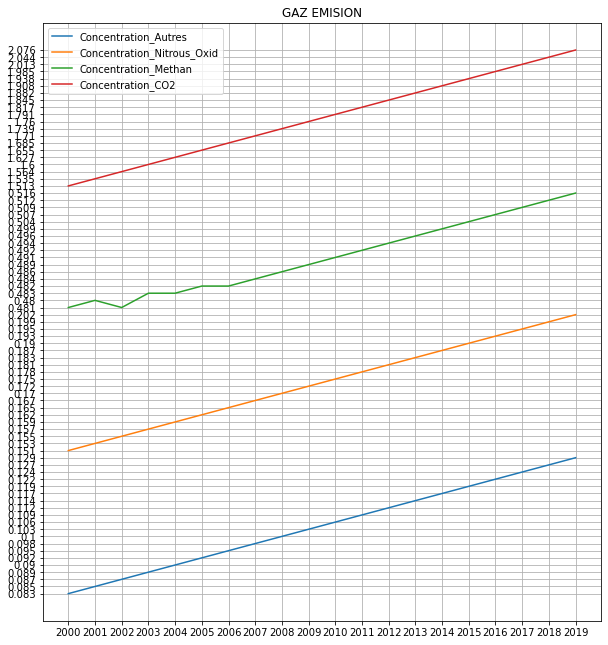

In [9]:
#Line Chart
x=data['Year']
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 11))
# plot each column
plt.plot(x, data["Concentration_Autres"],label= 'Concentration_Autres')
plt.plot(x, data["Concentration_Nitrous_Oxid"],label= 'Concentration_Nitrous_Oxid')
plt.plot(x, data["Concentration_Methan"],label= 'Concentration_Methan')
plt.plot(x, data["Concentration_CO2"],label= 'Concentration_CO2')
plt.legend()
# set title and legend
plt.title('GAZ EMISION')
plt.grid(True)
plt.show()

# temperature evolution /YEAR

In [10]:
SQL_Query = pd.read_sql_query('''select * from Temp''', conn)
Temp = pd.DataFrame(SQL_Query)

In [46]:
Temp.head(5)

,IdTemp,Year,Hot_Daily_Hights,Hot_Daily_Lows,Lower_Sea_Surface_Temp,Upper_Sea_Surface_Temp,Seasonal_Temp_Anomaly_Winter,Seasonal_Temp_Anomaly_Spring,Seasonal_Temp_Anomaly_Summer,Seasonal_Temp_Anomaly_Fall
0,1,2000,0.074,0.02,0.06708,0.17292,-4.06,3.17,-0.23,0.59
1,2,2001,0.087,0.031,0.30108,0.40692,0.6,0.82,0.04,-1.54
2,3,2002,0.004,0,0.340968,0.475032,-2.88,-1.98,-1.71,-0.85
3,4,2003,0.155,0.033,0.412608,0.511392,-1.26,-0.84,0.13,-0.08
4,5,2004,0.139,0.117,0.37308,0.47892,0.22,0.06,0.31,0.86


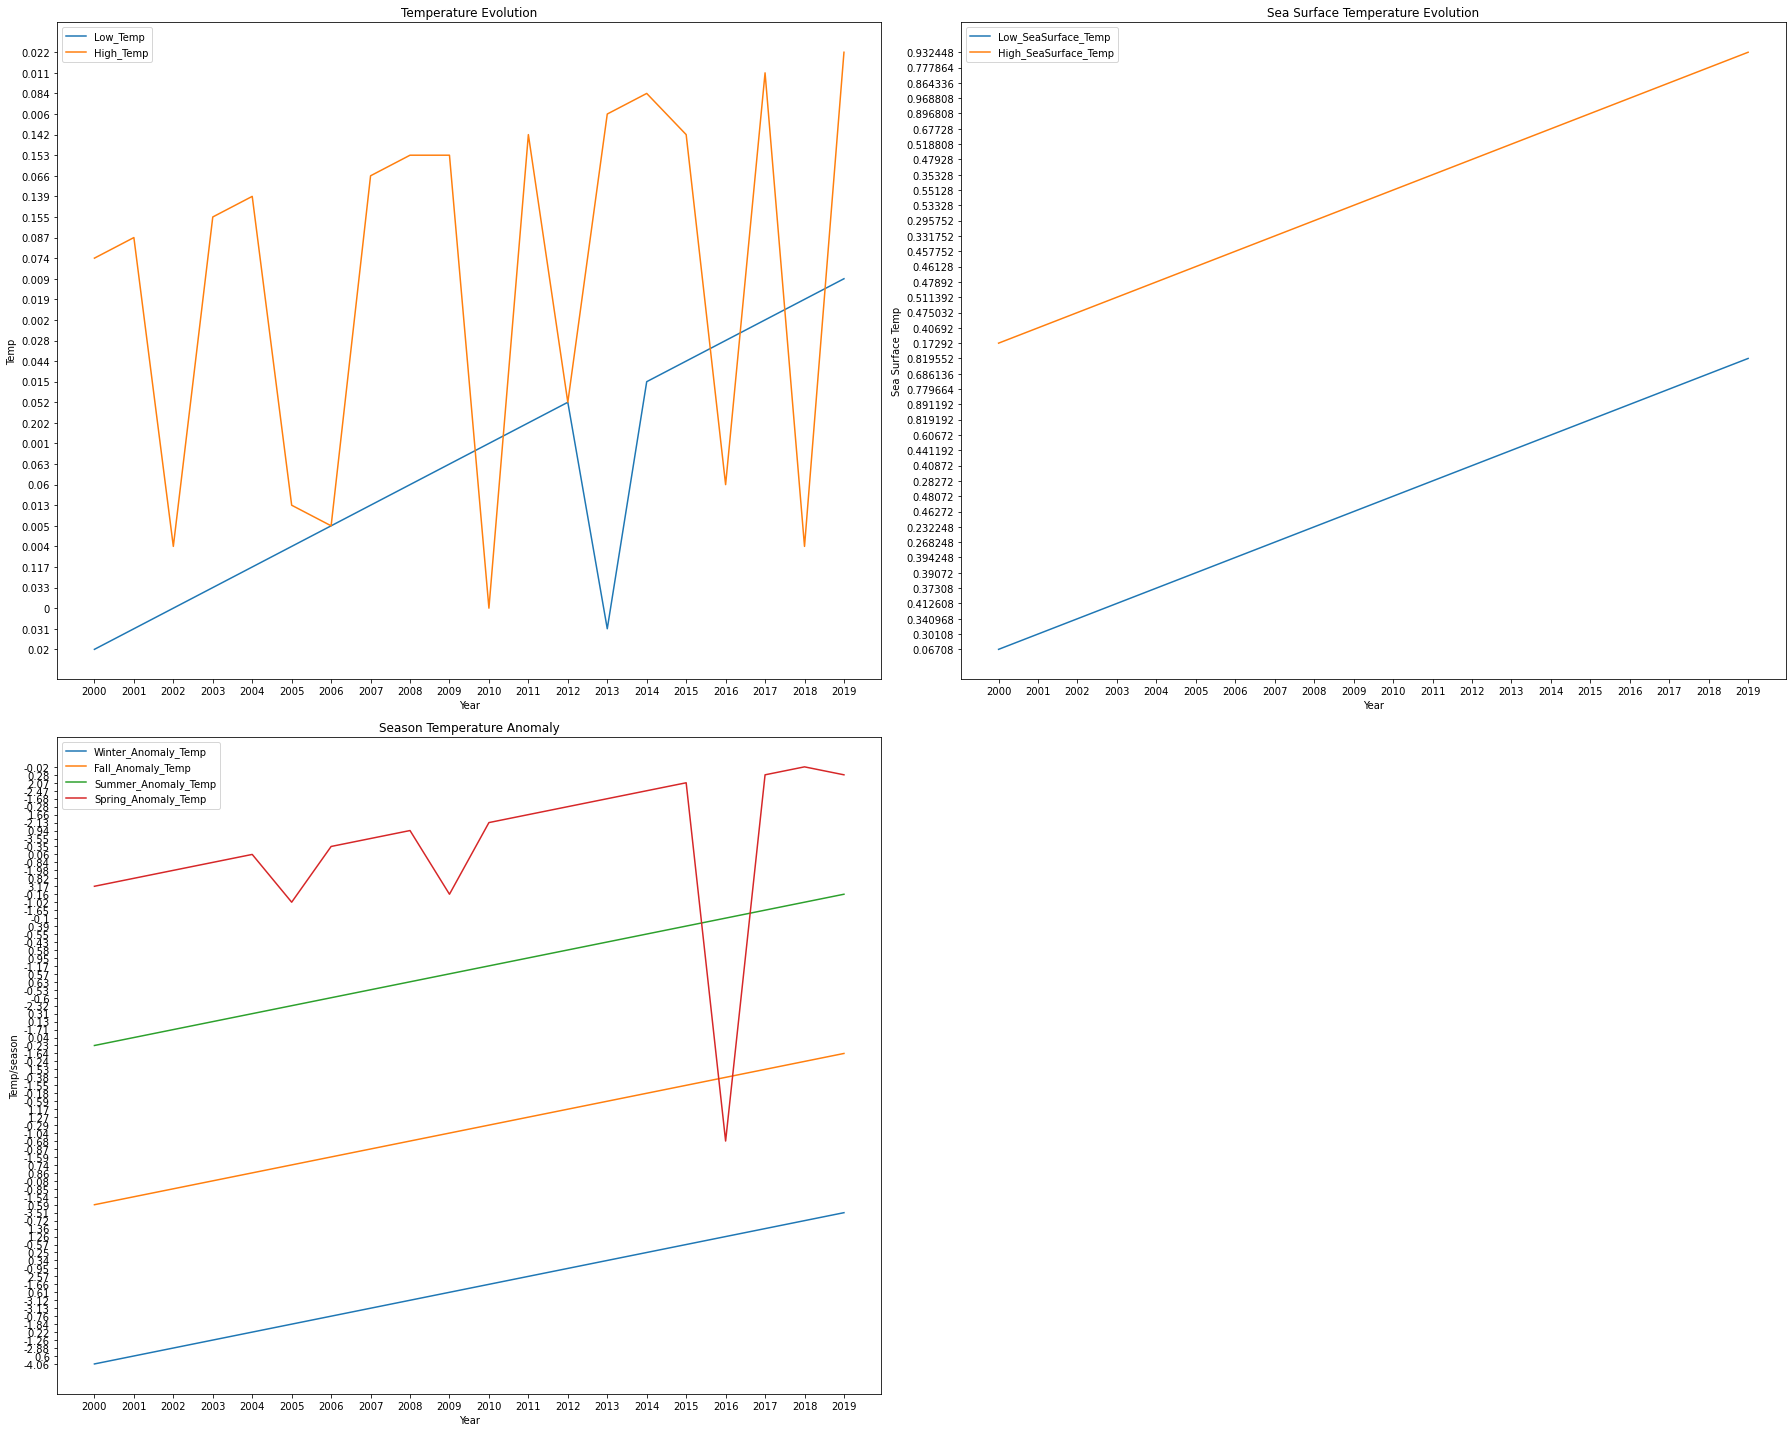

In [12]:
# plot model performance
Year= Temp['Year']
#Temperature evolution (Hihght VS Low)
High_Temp = Temp['Hot_Daily_Hights']
Low_Temp = Temp['Hot_Daily_Lows']
#Temperature evolution (upper lower Sea surface temperature)
High_SeaSurface_Temp = Temp['Upper_Sea_Surface_Temp']
Low_SeaSurface_Temp = Temp['Lower_Sea_Surface_Temp']

#Saison Temp diference
Winter_Temp = Temp['Seasonal_Temp_Anomaly_Winter']
Fall_Temp = Temp['Seasonal_Temp_Anomaly_Fall']
Summer_Temp = Temp['Seasonal_Temp_Anomaly_Summer']
Spring_Temp = Temp['Seasonal_Temp_Anomaly_Spring']




plt.figure(figsize=(25,20))

plt.subplot(2, 2, 1)
plt.plot(Year, Low_Temp, label='Low_Temp')
plt.plot(Year, High_Temp, label='High_Temp')
plt.legend( )
plt.xlabel('Year')
plt.ylabel('Temp')
plt.title('Temperature Evolution')

plt.subplot(2, 2, 2)
plt.plot(Year, Low_SeaSurface_Temp, label='Low_SeaSurface_Temp')
plt.plot(Year, High_SeaSurface_Temp, label='High_SeaSurface_Temp')
plt.legend( )
plt.xlabel('Year')
plt.ylabel('Sea Surface Temp')
plt.title('Sea Surface Temperature Evolution')

plt.subplot(2, 2, 3)
plt.plot(Year, Winter_Temp, label='Winter_Anomaly_Temp')
plt.plot(Year, Fall_Temp, label='Fall_Anomaly_Temp')
plt.plot(Year, Summer_Temp, label='Summer_Anomaly_Temp')
plt.plot(Year, Spring_Temp, label='Spring_Anomaly_Temp')
plt.legend( )
plt.xlabel('Year')
plt.ylabel('Temp/season')
plt.title('Season Temperature Anomaly')


plt.tight_layout()
plt.show()

# Les Causes du Réchauffement climatique

In [13]:
SQL_Query = pd.read_sql_query('''select * from Temp''', conn)
Temp = pd.DataFrame(SQL_Query)

In [14]:
SQL_Query = pd.read_sql_query('''select * from HumanActivities''', conn)
HA = pd.DataFrame(SQL_Query)
HA.head(5)

,IdHA,Year,Nombre_Population,Transportation,Electrecity_Generation,Industry,Agriculture,Commercial,Summer_Electrecity_consumption,Consumption_No_Renewal_Energy
0,1,2000,279040000,1913.656839,2349.510725,1598.823879,598.0511145,413.738352,734.9870316,3322199
1,2,2001,282162411,1885.55221,2310.008309,1549.211555,618.9274568,402.7437568,732.9992787,3326324
2,3,2002,284968955,1926.090039,2325.860812,1532.114174,621.9064121,404.3104074,731.2355023,3390061
3,4,2003,287625193,1933.433776,2357.17254,1510.796537,622.3574815,420.58694,715.6246114,3400092
4,5,2004,290107933,1965.962902,2390.210228,1559.489117,635.0240128,418.4504266,784.1205455,3491132


# CONSOMATION DES ENERGIES AVEC L'augmentation de nombre de population U.S;

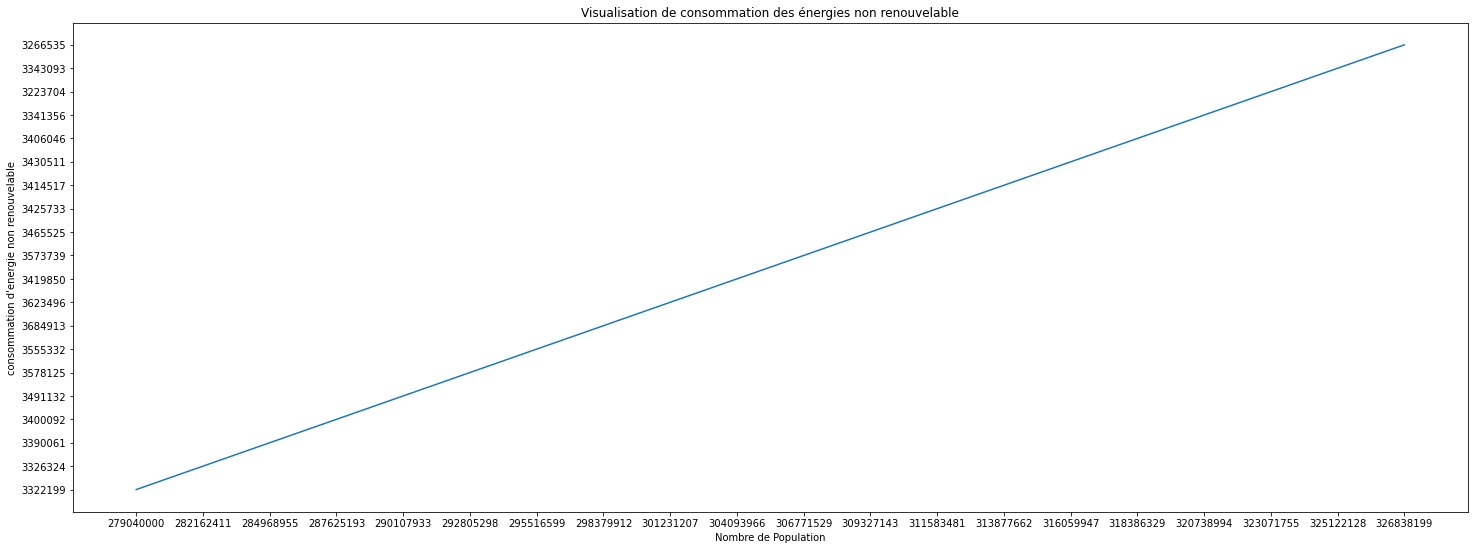

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.plot(HA['Nombre_Population'], HA['Consumption_No_Renewal_Energy'],label='Nombre_Population')
plt.xlabel('Nombre de Population')
plt.ylabel("consommation d'energie non renouvelable")
plt.title('Visualisation de consommation des énergies non renouvelable')
plt.show()
#ax2 = ax1.twinx()

    


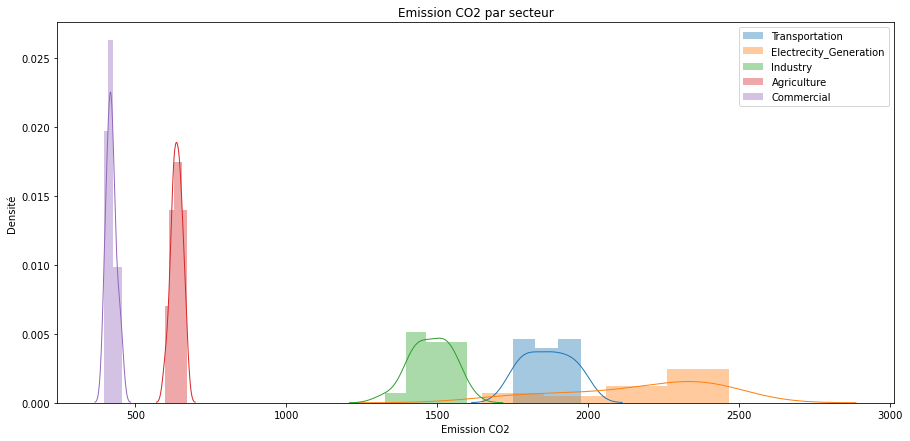

In [16]:
columns=HA.columns.drop(['IdHA','Nombre_Population','Year','Summer_Electrecity_consumption','Consumption_No_Renewal_Energy'])
plt.figure(figsize=(15,7))
for column in columns:
    
    # Draw the density plot
    sns.distplot(HA[column],hist = True, kde = True,
                 kde_kws = {'linewidth': 1},
                 label =column)
    
# Plot formatting
plt.legend( )
plt.xlabel('Emission CO2')
plt.ylabel('Densité')
plt.title('Emission CO2 par secteur')
plt.show()

Text(0.5, 1.0, 'Emission CO2 par secteur')

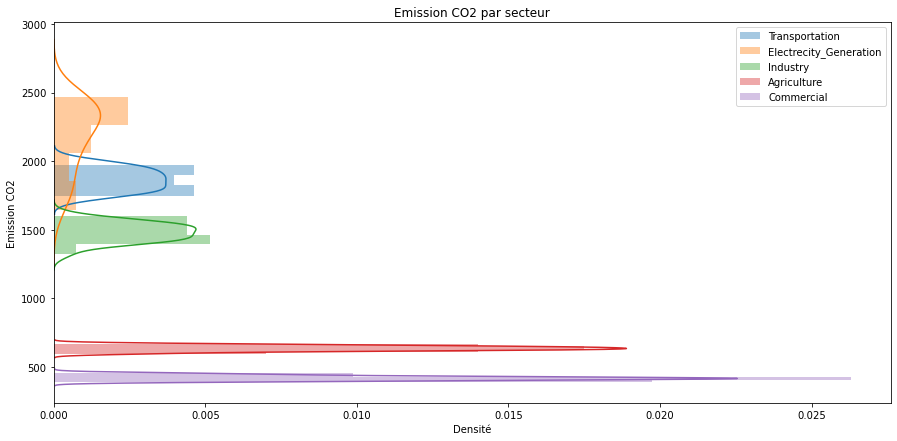

In [17]:
plt.figure(figsize=(15,7))
for column in columns:

    # Draw the density plot
   sns.distplot(HA[column], vertical=True,label=column)
plt.legend( )
plt.ylabel('Emission CO2')
plt.xlabel('Densité')
plt.title('Emission CO2 par secteur')

# Summer_Electrecity_consumption VS Temperature Changement in SUMMER

In [18]:

Year=Temp['Year']
ConsommationEnergyElectric=HA['Summer_Electrecity_consumption']
Summer_Temp = Temp['Seasonal_Temp_Anomaly_Summer']

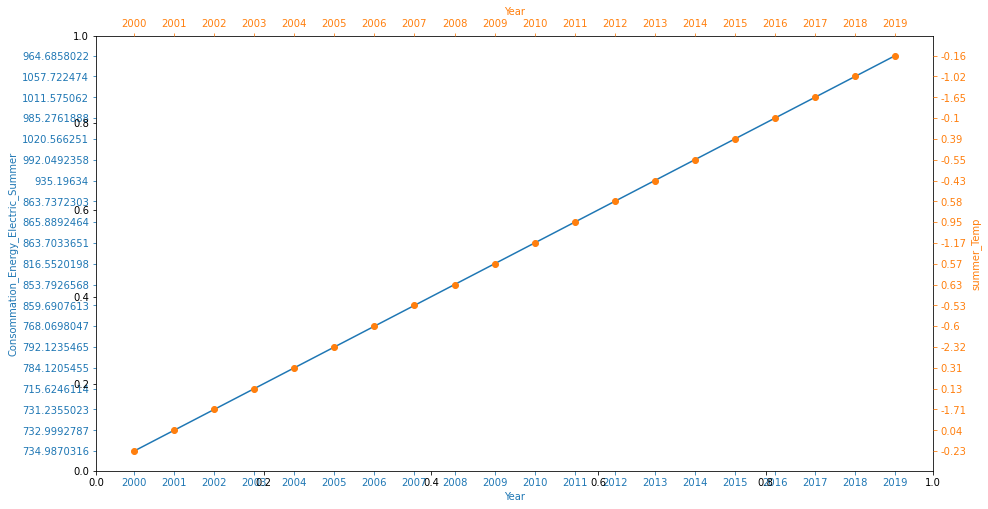

In [19]:
fig=plt.figure(figsize=(15,8))

ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(Year, ConsommationEnergyElectric, color="C0")
ax.set_xlabel("Year", color="C0")
ax.set_ylabel("Consommation_Energy_Electric_Summer", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(Year,Summer_Temp, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Year', color="C1") 
ax2.set_ylabel('summer_Temp', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()


# EFFET

In [20]:
# gaz est le plus concentré dans l'atmosphère et représente une cause directe de ce changement climatique 

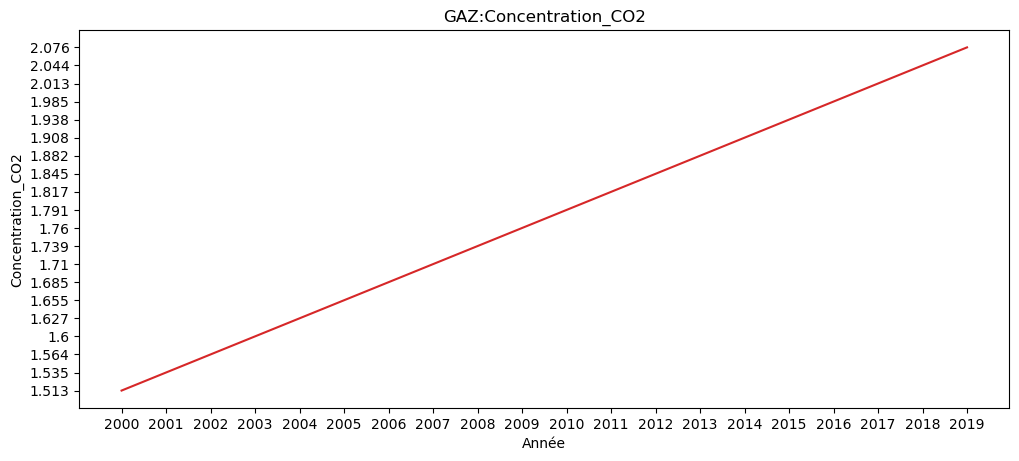

In [21]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

data2=data.columns.drop(['Year'])
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Année', ylabel='Concentration_CO2', dpi=100):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.Year, y=data.Concentration_CO2, title='GAZ:Concentration_CO2')

L’impact d’émission du gaz à effet de serre (CO2)sur la température 

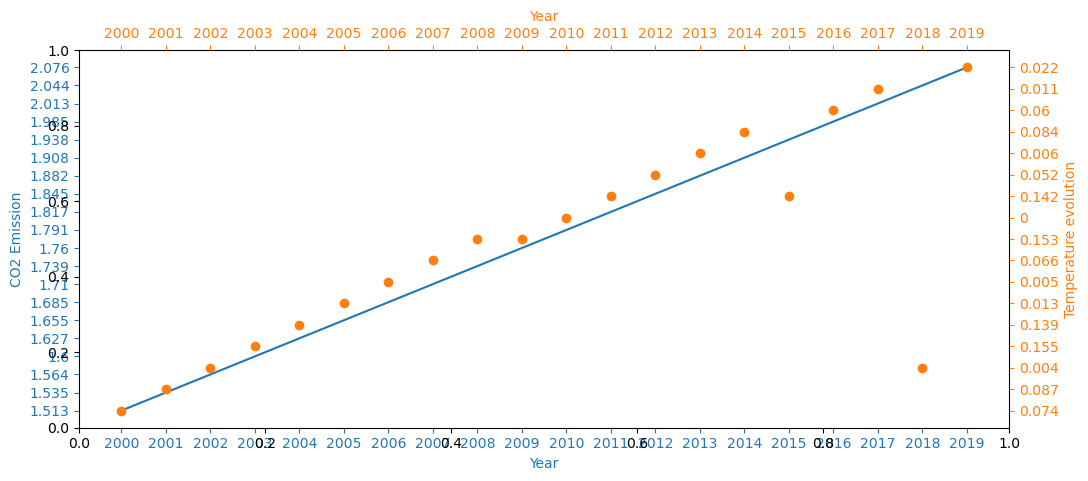

In [22]:
import matplotlib.pyplot as plt

Year=Temp['Year']
#Temperature evolution (Hihght VS Low)
High_Temp = Temp['Hot_Daily_Hights']
CO2=data["Concentration_CO2"]
# Draw Plot
fig=plt.figure(figsize=(12,5), dpi=100)
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(Year, CO2, color="C0")
ax.set_xlabel("Year", color="C0")
ax.set_ylabel("CO2 Emission", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(Year,High_Temp, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Year', color="C1") 
ax2.set_ylabel('Temperature evolution', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()


In [61]:
SQL_Query = pd.read_sql_query('''select * from Drought''', conn)
SECH = pd.DataFrame(SQL_Query)
SECH.head(2)

,IdSech,Year,Annual_Average,Degre_Secheresse
0,1,2000,-4.438333333,Extr?me
1,2,2001,-2.87,Mod?re


In [29]:
SQL_Query = pd.read_sql_query('''select * from NaturalDisaster''', conn)
ND = pd.DataFrame(SQL_Query)
ND.head(5)

,IdND,Year,Nombre_Catastrophe_Naturelle,Economic_Damage
0,1,2000,411,30000000
1,2,2001,376,0
2,3,2002,421,0
3,4,2003,360,480000000
4,5,2004,350,0


#  (degre de sech et year)


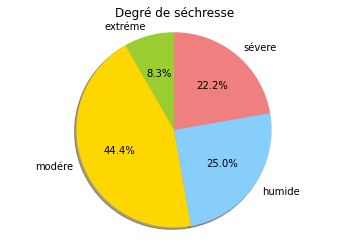

In [40]:
import matplotlib.pyplot as plt


for row in SECH['Degre_Secheresse']:
    labels ='extréme','modére' ,'humide','sévere'
sizes = [15, 80, 45, 40]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Degré de séchresse")

plt.savefig('PieChart01.png')
plt.show()

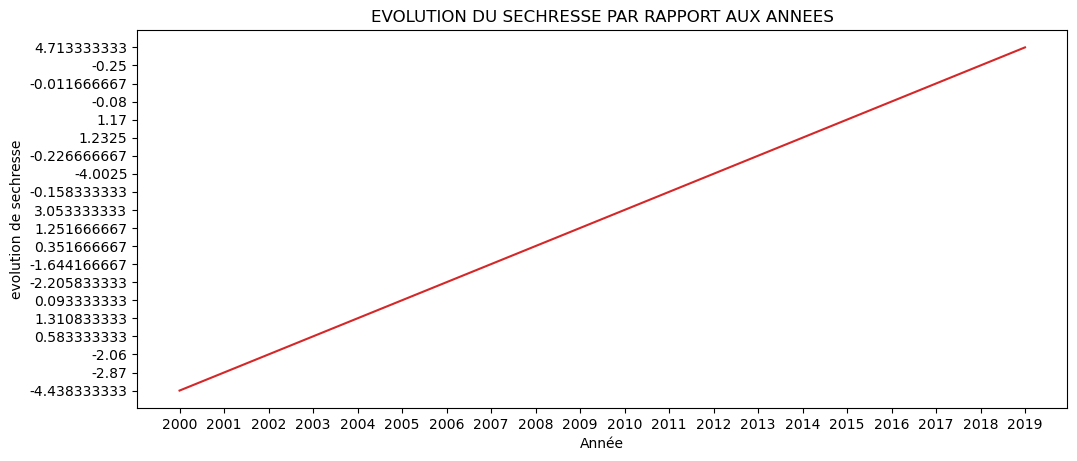

In [44]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Année', ylabel='evolution de sechresse', dpi=100):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(SECH, x=SECH.Year, y=SECH.Annual_Average, title='EVOLUTION DU SECHRESSE PAR RAPPORT AUX ANNEES')

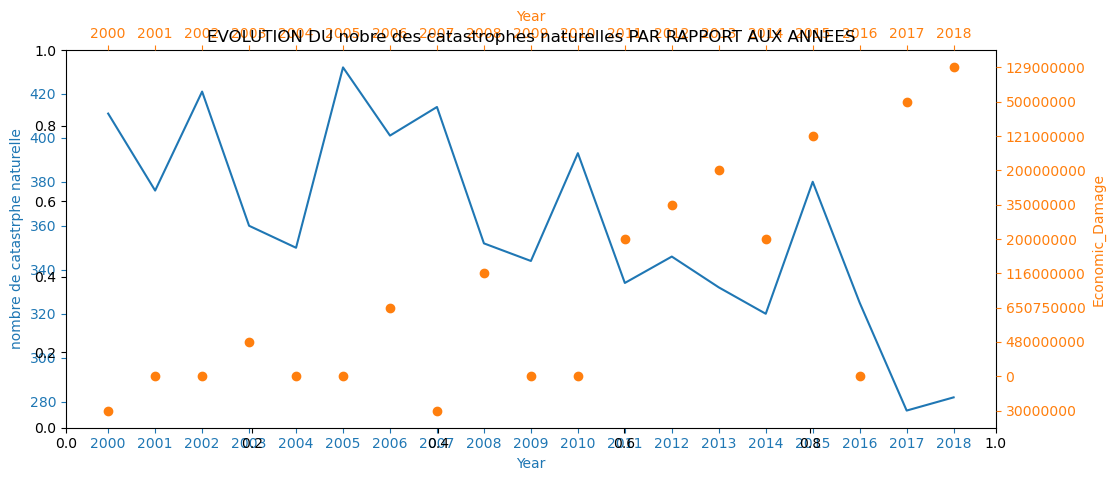

In [49]:
# Time series data source: fpp pacakge in R.


import matplotlib.pyplot as plt

#Temperature evolution (Hihght VS Low)
Year=ND["Year"]
y=ND["Nombre_Catastrophe_Naturelle"]
z=ND["Economic_Damage"]
# Draw Plot
fig=plt.figure(figsize=(12,5), dpi=100)
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(Year, y, color="C0")
ax.set_xlabel("Year", color="C0")
ax.set_ylabel("nombre de catastrphe naturelle", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(Year,z, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Year', color="C1") 
ax2.set_ylabel('Economic_Damage', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.title("EVOLUTION DU nobre des catastrophes naturelles PAR RAPPORT AUX ANNEES")
plt.show()

<Figure size 864x1080 with 0 Axes>

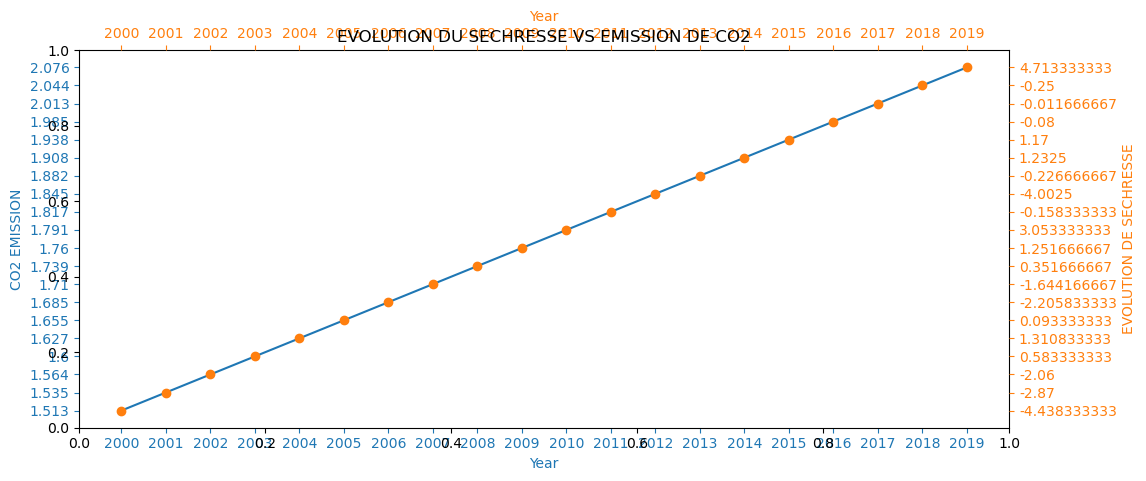

In [62]:
plt.figure(figsize=(12,15))
Year=data.Year
CO2=data["Concentration_CO2"]
SECH=SECH["Annual_Average"]
# Draw Plot
fig=plt.figure(figsize=(12,5), dpi=100)
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(Year, CO2, color="C0")
ax.set_xlabel("Year", color="C0")
ax.set_ylabel("CO2 EMISSION", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(Year,SECH, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Year', color="C1") 
ax2.set_ylabel('EVOLUTION DE SECHRESSE', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.title("EVOLUTION DU SECHRESSE VS EMISSION DE CO2")
plt.show()

# SOLUTION:ENERGY RENOUVELABLE

In [117]:
SQL_Query = pd.read_sql_query('''select * from RenawblEnergy''', conn)
RE = pd.DataFrame(SQL_Query)
RE.head(5)

,IdRE,Year,Total_RE_Consumption_Electrecity_Sector,ToTal_RE_Production
0,1,2000,"3426,524","6101,667"
1,2,2001,"2763,015","5161,772"
2,3,2002,"3288,351","5730,902"
3,4,2003,"3410,95","5942,467"
4,5,2004,"3338,717","6062,671"


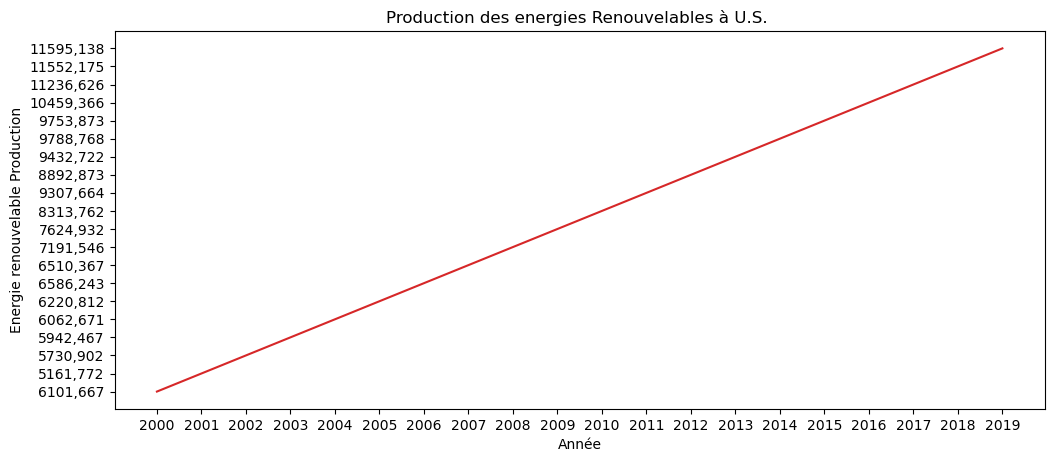

In [101]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Année', ylabel='Energie renouvelable Production', dpi=100):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(RE, x=RE.Year, y=RE.ToTal_RE_Production, title='Production des energies Renouvelables à U.S. ')

<Figure size 864x1080 with 0 Axes>

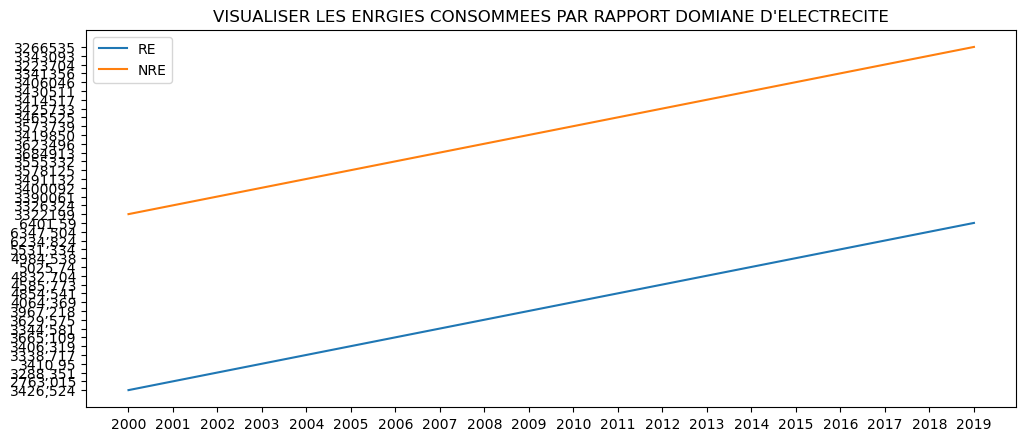

In [102]:
plt.figure(figsize=(12,15))
Year=RE["Year"]
RE=RE["Total_RE_Consumption_Electrecity_Sector"]
NRE=HA["Consumption_No_Renewal_Energy"]

# Draw Plot
plt.figure(figsize=(12,5), dpi=100)


plt.plot(Year,RE, color="C0",label="RE")


plt.plot(Year,NRE, color="C1",label="NRE")
plt.legend()


plt.title("VISUALISER LES ENRGIES CONSOMMEES PAR RAPPORT DOMIANE D'ELECTRECITE")
plt.show()

# prediction co2 

Merge two DF (RE and GAZ)

In [147]:
dfm = pd.merge(RE, data, on=['Year']).dropna()

In [148]:
dfm.head()

,IdRE,Year,Total_RE_Consumption_Electrecity_Sector,ToTal_RE_Production,Concentration_CO2,Concentration_Methan,Concentration_Nitrous_Oxid,Concentration_Autres
0,1,2000,"3426,524","6101,667",1.513,0.481,0.151,0.083
1,2,2001,"2763,015","5161,772",1.535,0.48,0.153,0.085
2,3,2002,"3288,351","5730,902",1.564,0.481,0.155,0.087
3,4,2003,"3410,95","5942,467",1.6,0.483,0.157,0.089
4,5,2004,"3338,717","6062,671",1.627,0.483,0.159,0.09


In [219]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [224]:
df_fus = pd.read_excel (r'C:\Users\PC\Desktop\yalah.xlsx')
df_fus.head()

,Year,CO2,Total Renewable Energy Consumed by the Electric Power Sector,NO Renawbale Energy consumption
0,2000,1.513,3426.524,3322199
1,2001,1.535,2763.015,3326324
2,2002,1.564,3288.351,3390061
3,2003,1.600,3410.950,3400092
4,2004,1.627,3338.717,3491132


In [268]:
# Train set e Test set
X = df_fus[['Year','NO Renawbale Energy consumption']] #input or attributes
Y = df_fus[['CO2']] # output or label
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1 ,shuffle=False)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
pred_y=pd.DataFrame(pred_y)
#prediction = pd.DataFrame({'NRE_Consumption': [i[0] for i in X_test], 'CO2_Emission': [k for k in pred_y]})
#prediction


#Creer nouveau Dataframe combine entre X_test[0] et y_predit
y_pred=pd.DataFrame(y_pred,columns=['pred'])
   # initialize list of lists
OUTPUT = [[X_test.Year.iloc[0],y_test.CO2.iloc[0], y_pred.pred.iloc[0]],[X_test.Year.iloc[1],y_test.CO2.iloc[1], y_pred.pred.iloc[1]],[X_test.Year.iloc[2],y_test.CO2.iloc[2], y_pred.pred.iloc[2]],[X_test.Year.iloc[3],y_test.CO2.iloc[3], y_pred.pred.iloc[3]],[X_test.Year.iloc[4],y_test.CO2.iloc[4], y_pred.pred.iloc[4]]]

 # Create the pandas DataFrame
df = pd.DataFrame(OUTPUT , columns = ['Year','CO2', 'CO2_Pred'])
df



<IPython.core.display.Javascript object>

,Year,CO2,CO2_Pred
0,2015,1.938,1.932374
1,2016,1.985,1.959659
2,2017,2.013,1.986315
3,2018,2.044,2.015790
4,2019,2.076,2.042935


In [263]:
#Définir la colonne datetime comme indice de notre dataframe
df = df.set_index(['Year'])
df

,CO2,CO2_Pred
Year,,
2015,1.938,1.932374
2016,1.985,1.959659
2017,2.013,1.986315
2018,2.044,2.015790
2019,2.076,2.042935


In [264]:
# Création d'une fonction des mesures de performances
def evaluate_forecast(indexedDataset,pred, column):
    results = pd.DataFrame({'r2_score':r2_score(indexedDataset, pred),
                           }, index=[column])
    
    results['min'] = indexedDataset.min()
    results['max'] = indexedDataset.max()
    results['mean'] = indexedDataset.mean()
    results['mse'] = mean_squared_error(indexedDataset, pred)
    results['mae'] = mean_absolute_error(indexedDataset, pred)
    results['rmse'] = np.sqrt(results['mse'])
    results['taux_erreur'] = results['rmse']/results['max']
    return results

In [265]:
# Mesures de performance pour le télépéage
evaluate_forecast(df.iloc[:,0], df.iloc[:,1], 'CO2')

,r2_score,min,max,mean,mse,mae,rmse,taux_erreur
CO2,0.710765,1.938,2.076,2.0112,0.000655,0.023785,0.025593,0.012328


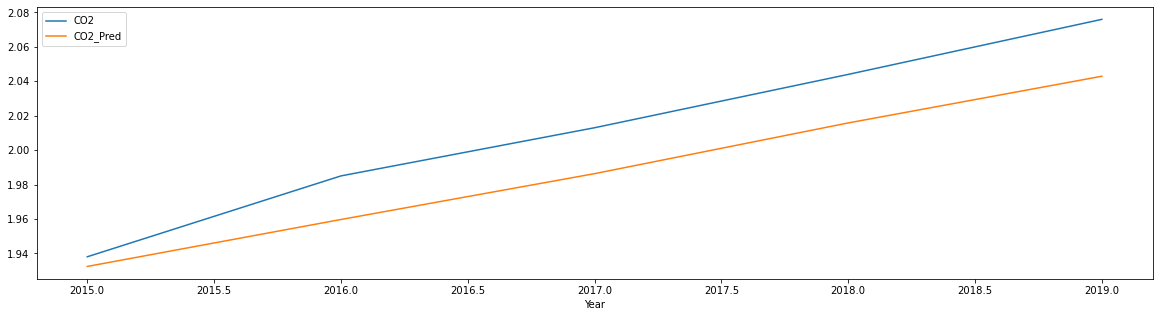

In [266]:
# Visualisation des prédictions 
df[['CO2','CO2_Pred']].plot()

plt.rcParams["figure.figsize"] = (20,5)